In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from MODULES.vae_model import *
from MODULES.utilities_ml import process_one_epoch
from MODULES.utilities_visualization import show_batch
import torch.nn.functional as F

# Check versions
from platform import python_version
print("python_version() ---> ", python_version())
print("torch.__version__ --> ", torch.__version__)

python_version() --->  3.8.2
torch.__version__ -->  1.6.0


In [25]:
params = load_json_as_dict("./ML_parameters.json")
vae = CompositionalVae(params)

In [26]:
# params

In [27]:
image_size = params['input_image']['size_raw_image']
b, c, w, h = 8, params['input_image']['ch_in'], image_size, image_size
imgs_in = torch.sigmoid(torch.randn(b,c,w, h))

optimizer = instantiate_optimizer(model=vae, dict_params_optimizer=params["optimizer"])

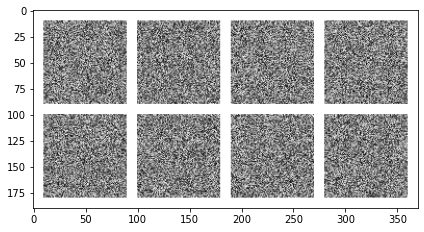

In [28]:
show_batch(imgs_in)

In [29]:
from MODULES.utilities_ml import SpecialDataSet

train_loader = SpecialDataSet(img=imgs_in,
                              store_in_cuda=False,
                              shuffle=True,
                              drop_last=True,
                              batch_size=2)
optimizer = instantiate_optimizer(model=vae, dict_params_optimizer=params["optimizer"])
epoch_restart = -1
history_dict = {}
min_test_loss = 99999999
    
for delta_epoch in range(1, 5):
    epoch = delta_epoch+epoch_restart
    with torch.autograd.set_detect_anomaly(True):
        train_metrics = process_one_epoch(model=vae, 
                                          dataloader=train_loader, 
                                          optimizer=optimizer, 
                                          verbose=True)
        print(train_metrics.pretty_print(epoch))

i =   0 train_loss=100.77852
i =   1 train_loss=100.85841
i =   2 train_loss=100.45371
i =   3 train_loss=97.30514
[epoch    0] loss=99.849, mse=102.986,         reg=3.656, kl_tot=1.127, sparsity=14.152,         fg_fraction=0.152, geco_sp=1.000, geco_bal=0.802
i =   0 train_loss=103.58367
i =   1 train_loss=98.93217
i =   2 train_loss=98.85439
i =   3 train_loss=97.80708
[epoch    1] loss=99.794, mse=104.074,         reg=3.429, kl_tot=6.692, sparsity=11.891,         fg_fraction=0.143, geco_sp=1.000, geco_bal=0.806
i =   0 train_loss=97.95499
i =   1 train_loss=97.04350
i =   2 train_loss=98.06394
i =   3 train_loss=94.67107
[epoch    2] loss=96.933, mse=99.679,         reg=4.515, kl_tot=1.213, sparsity=12.359,         fg_fraction=0.185, geco_sp=1.000, geco_bal=0.809
i =   0 train_loss=100.78152
i =   1 train_loss=101.08317
i =   2 train_loss=101.02627
i =   3 train_loss=102.18484
[epoch    3] loss=101.269, mse=106.761,         reg=4.972, kl_tot=3.201, sparsity=9.779,         fg_fractio

In [33]:
generated = vae.generate(imgs_in, draw_boxes=True)

('metrics', 'inference', 'imgs')
('area_map', 'prob_map', 'prob_few', 'c_few', 'bb_few', 'big_bg', 'big_img', 'mixing', 'mixing_non_interacting', 'sample_c_map', 'sample_zwhere', 'sample_zinstance', 'sample_zbg', 'kl_zbg', 'kl_logit', 'kl_zwhere', 'kl_zinstance', 'similarity_l', 'similarity_w')
torch.Size([8, 1, 20, 20])


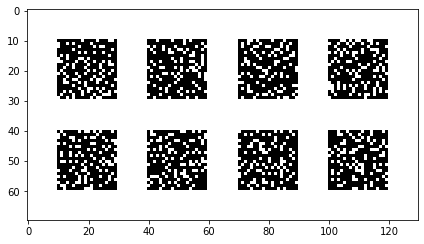

In [34]:
print(generated._fields)
print(generated.inference._fields)
print(generated.inference.sample_c_map.shape)
show_batch(generated.inference.sample_c_map.float())

Uninitialized: You must initialize neptune-client first. For more information, please visit: https://github.com/neptune-ai/neptune-client#initialize-neptune

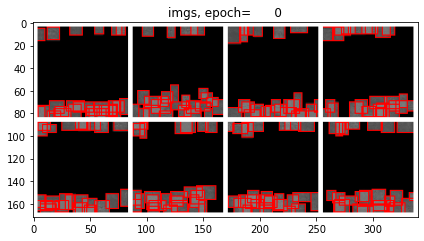

In [35]:
from MODULES.utilities_visualization import plot_reconstruction_and_inference, plot_segmentation

plot_reconstruction_and_inference(generated, epoch=0, prefix="gen_")

In [36]:
output = vae.forward(imgs_in, draw_image=True, draw_boxes=True, verbose=False)

In [37]:
print(output.inference.bb_few.bh[..., 0])
print(vae.inference_and_generator.size_min)
print(vae.inference_and_generator.size_max)

tensor([6.4307, 5.5855, 5.3944, 5.1705, 5.0651, 5.0610, 5.0766, 5.0524, 5.0448,
        5.0498, 5.0409, 5.0447, 5.0692, 5.0634, 5.0565, 5.0854, 5.2147, 5.3019,
        5.7934, 7.0093, 5.3482, 5.0420, 5.0064, 5.0017, 5.0006],
       grad_fn=<SelectBackward>)
5
20


Uninitialized: You must initialize neptune-client first. For more information, please visit: https://github.com/neptune-ai/neptune-client#initialize-neptune

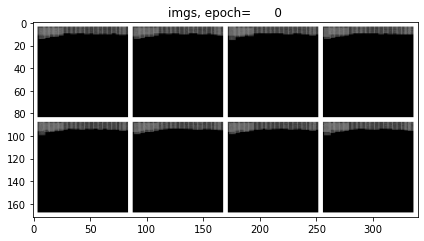

In [38]:
plot_reconstruction_and_inference(output, epoch=0, prefix="rec_")

In [ ]:
vae